In [1]:
# Import packages
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scarlet
import pickle

import kuaizi as kz
from kuaizi.display import display_single, SEG_CMAP

import sep

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.coordinates import SkyCoord

#plt.rcParams['font.size'] = 15
#plt.rc('image', cmap='inferno', interpolation='none', origin='lower')

### Make one figure containing all useful information

In [2]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/tigress/jiaxuanl/Data')

'/tigress/jiaxuanl/Data/HSC/LSBG'

In [49]:
lsbg_cat = Table.read('./Cutout/Candy/candy_cutout_cat.fits')

In [5]:
lsbg_cat[:5]

<Table length=5>
     ra        dec     a_image b_image ...  radius image_flag [5] psf_flag [5]
                                       ...  arcsec                            
  float64    float64   float64 float64 ... float64      bool          bool    
----------- ---------- ------- ------- ... ------- -------------- ------------
225.3020883  1.0550868  26.224  17.616 ...     1.5   True .. True True .. True
181.0873682 -1.5183761  53.428  42.355 ...     1.0   True .. True True .. True
190.2022409  0.4494237  62.347  32.252 ...     1.0   True .. True True .. True
333.6455774  1.6049543   15.95   5.242 ...     1.0   True .. True True .. True
139.8679525  3.7603522  23.143  15.864 ...     1.0   True .. True True .. True

In [6]:
lsbg = lsbg_cat[0]
channels = 'grizy'

cutout = [fits.open(f"{lsbg['prefix']}_{band}.fits") for band in channels]
psf_list = [fits.open(f"{lsbg['prefix']}_{band}_psf.fits") for band in channels]

In [8]:
# Reconstructure data
from kuaizi.utils import padding_PSF
from kuaizi.mock import Data

images = np.array([hdu[1].data for hdu in cutout])
w = wcs.WCS(cutout[0][1].header) # note: all bands share the same WCS here
filters = channels
weights = 1 / np.array([hdu[3].data for hdu in cutout])
psf_pad = padding_PSF(psf_list) # Padding PSF cutouts from HSC
psfs = scarlet.ImagePSF(np.array(psf_pad))
data = Data(images=images, weights=weights, wcs=w, psfs=psfs, channels=channels)

### Run scarlet modeling

In [43]:
from kuaizi.fitting import fitting_wavelet_obs_tigress, _fitting_wavelet
import os

In [21]:
channels = 'griz'

In [38]:
overlap = [i for i, item in enumerate('grizy') if item in 'grz']

In [41]:
obj = lsbg_cat[10]

In [47]:
True & True

True

In [24]:
list('grz') in list('grizy')

False

In [20]:
np.all()

True

In [14]:
kz.utils.set_env(**env_dict)

'/tigress/jiaxuanl/Data/HSC/LSBG'

In [ ]:
## need to write anomaly to a file

Only generate one useful figure for each fitting! should include raw image, moderately masked image, aggressively masked image, aggressively masked residual, loss curve


### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_5`
  - Detect sources and make mask
    Query GAIA stars...
    Taking Gaia catalogs stored in `Tigress`
    10 stars from Gaia are masked!
    Detected 258 objects
    10 stars from Gaia are masked!
    Detected 305 objects
    Detected 110 objects
  - Wavelet modeling with the following hyperparameters:
    min_grad = -0.30, starlet_thresh = 1.00 (contam_ratio = 0.04).
    Optimizaiton: Succeed for e_rel = 1e-4 with 14 iterations! Try higher accuracy!
  - After 48 iterations, logL = 2181342.781915452
    Elapsed time for fitting: 27.947020292282104 s
  - Components [0] are considered as the target galaxy.
  - Masking stars and other sources that are modeled, to deal with leaky flux issue.
  - Saving the results as /tigress/jiaxuanl/Data/HSC/LSBG/Model/candy-5-trained-model-wavelet.df


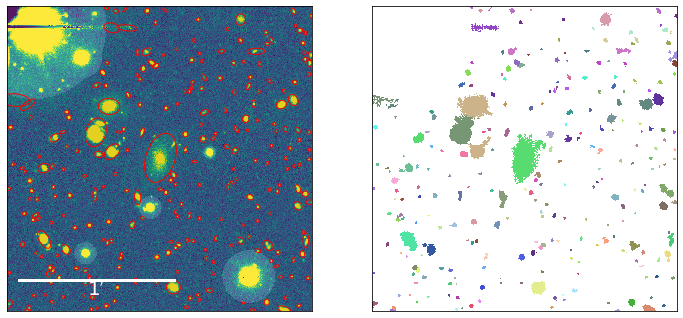

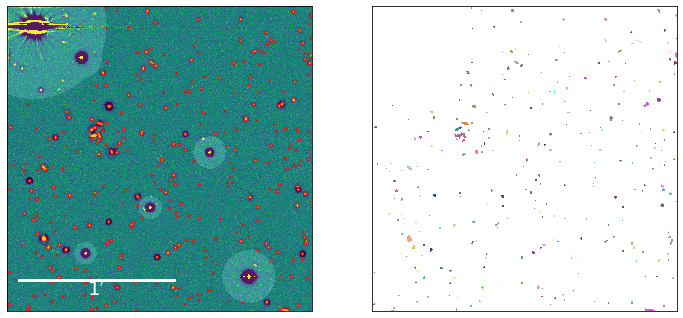

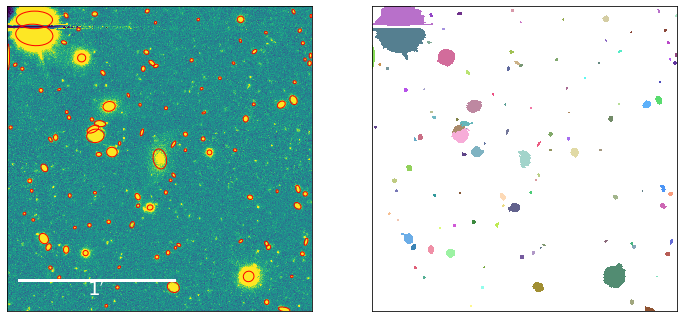

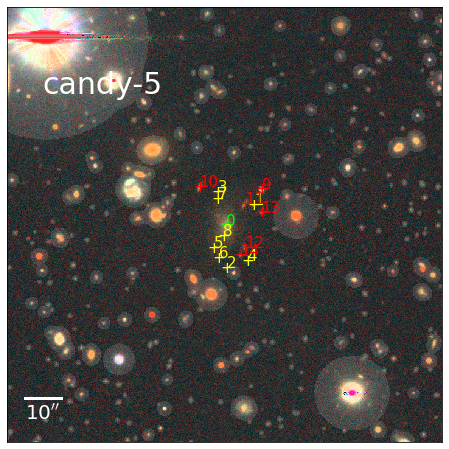

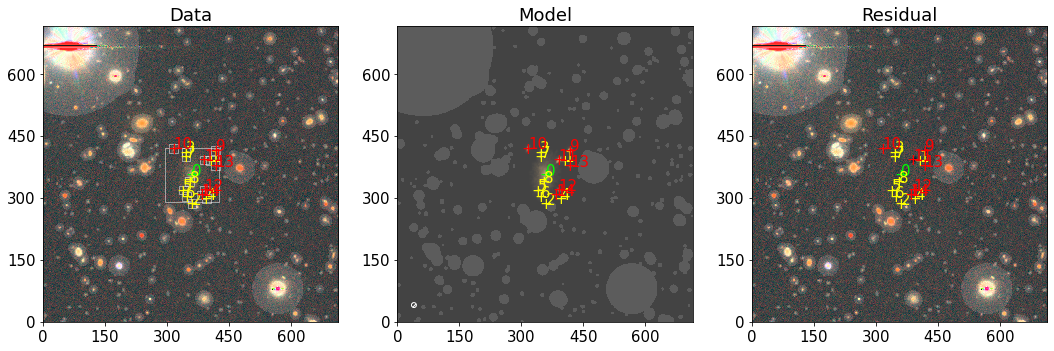

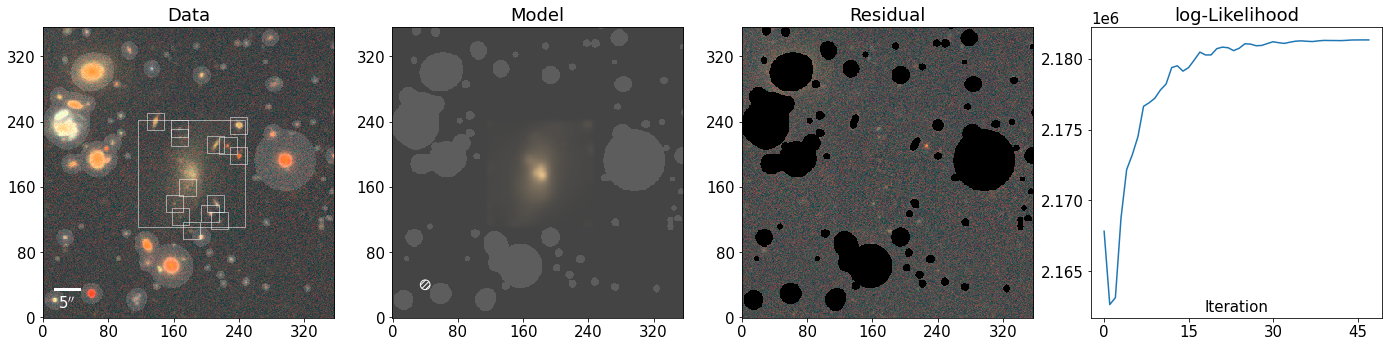

In [108]:
index = 5
blend = fitting_wavelet_obs_tigress(
    {'project': 'HSC', 'name': 'LSBG', 'data_dir': '/tigress/jiaxuanl/Data'}, 
    lsbg_cat[index],
    name='Seq',
    channels='griz',
    starlet_thresh=1,
    prefix='candy',
    show_figure=True)

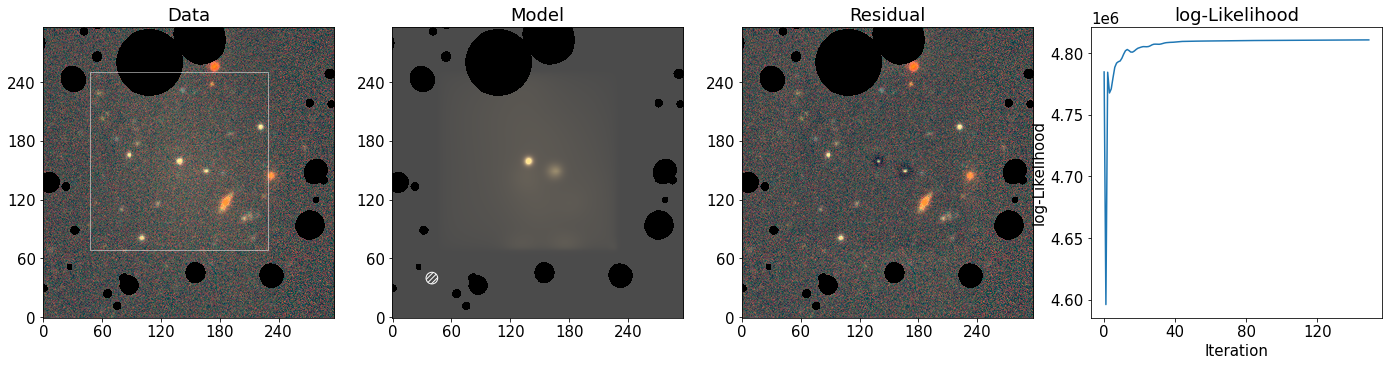

In [59]:
fig = kz.display.display_scarlet_model(
        blend,
        show_ind=[0],
        zoomin_size=50,
        minimum=-0.3,
        stretch=1,
        Q=1,
        channels='griz',
        show_loss=True,
        show_mask=True,
        show_mark=False,
        scale_bar=False)

In [102]:
import dill
with open('/tigress/jiaxuanl/Data/HSC/LSBG/Model/candy-0-trained-model-wavelet.df', 'rb') as f:
    blend, info, aggr_mask = dill.load(f)

In [103]:
mask = (np.sum(blend.observations[0].weights == 0, axis=0) != 0)

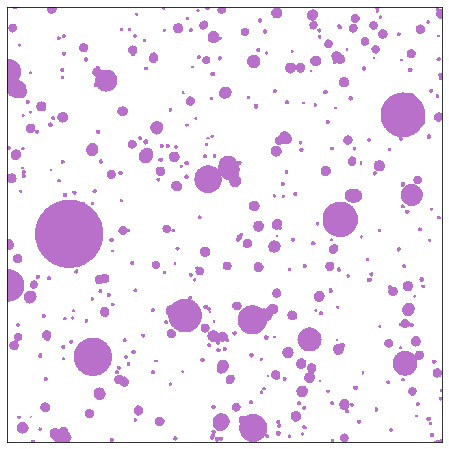

In [106]:
display_single((mask | aggr_mask).astype(float), cmap=SEG_CMAP, scale='linear');

In [69]:
22.39902 * 6

134.39412

In [66]:
lsbg_cat[0]

<Row index=0>
     ra        dec    a_image b_image theta_image ellipticity mag_auto_g mag_auto_r mag_auto_i flux_radius_ave_g flux_radius_ave_i      mu_ave_g           mu_ave_i        acorr_ratio            g-i                g-r                 A_g                 A_r                 A_i         tract patch  synth_id viz-id objectid  Seq  cutout_size                        prefix                         radius image_flag [5] psf_flag [5]
                                                                                                                                                                                                                                                                                                                                            arcmin                                                         arcsec                            
  float64    float64  float64 float64   float64     float64    float64    float64    float64        float64           float64           float64            float64           float64            float64            float64             float64             float64             float64       int64 bytes3  int64   int64   int64   int64   float64                         bytes54                        float64      bool          bool    
----------- --------- ------- ------- ----------- ----------- ---------- ---------- ---------- ----------------- ----------------- ------------------ ----------------- ------------------ ------------------ ------------------ ------------------- ------------------- ------------------- ----- ------ -------- ------ -------- ----- ----------- ---------------------------------------------------- ------- -------------- ------------
225.3020883 1.0550868  26.224  17.616       82.68       0.328    20.0629    18.5655    18.0075          14.22708          22.39902 27.266820128426676 26.55830937698006 1.1643505268070824 1.2578408501384883 0.9366706388175572 0.12434132134058919 0.08811196015814717 0.06288217147907928  9621    3,6       -1  42352    42352     0         1.5 /tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_0     1.5   True .. True True .. True

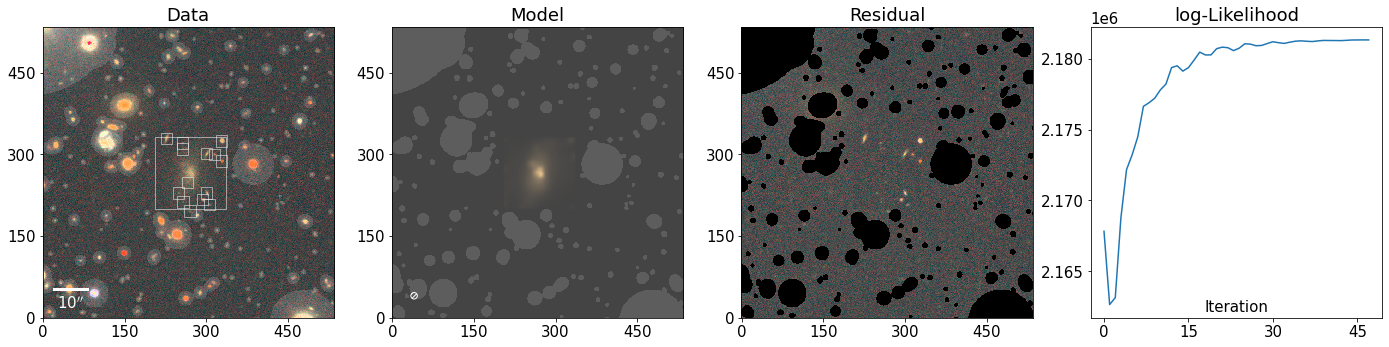

In [109]:
fig = kz.display.display_scarlet_results_tigress(
        blend,
    aggr_mask,
        show_ind=[0],
        zoomin_size=90,
        minimum=-0.3,
        stretch=1,
        Q=1,
        channels='griz',
        show_loss=True,
        show_mask=False,
        show_mark=False,
        scale_bar=True)